In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import re
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [26]:
import warnings
warnings.filterwarnings('ignore')

#### Data Cleaning - 

In [27]:
df1=pd.read_csv('Emotion(angry).csv')
df1.head()

,content,sentiment
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angry
1,Not available for busy people☺,angry
2,I do not exist to impress the world. I exist t...,angry
3,Everything is getting expensive except some pe...,angry
4,My phone screen is brighter than my future 🙁,angry


In [28]:
df2=pd.read_csv('Emotion(happy).csv')
df2.head()

,content,sentiment
0,Wants to know how the hell I can remember word...,happy
1,Love is a long sweet dream & marriage is an al...,happy
2,The world could be amazing when you are slight...,happy
3,My secret talent is getting tired without doin...,happy
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happy


In [29]:
df3=pd.read_csv('Emotion(sad).csv')
df3.head()

,content,sentiment
0,"Never hurt people who love you a lot, because ...",sad
1,Don’t expect me to tell you what you did wrong...,sad
2,I preferred walking away than fighting for you...,sad
3,"Moving forward in life isn’t the hard part, it...",sad
4,"Never cry for anyone in your life, because tho...",sad


In [30]:
#concatnating all the dataframes into single dataframe
df=pd.concat([df1,df2,df3],axis=0)
df.head(10)

,content,sentiment
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angry
1,Not available for busy people☺,angry
2,I do not exist to impress the world. I exist t...,angry
3,Everything is getting expensive except some pe...,angry
4,My phone screen is brighter than my future 🙁,angry
5,Anger is a feeling that makes your mouth work ...,angry
6,"This man, is man, a man, good man, way man, to...",angry
7,Sometimes the best way to get someone\’s atten...,angry
8,"People like to bring up your past, when your p...",angry
9,Wakeup>job>noluv>daaru>sleep>repeat..,angry


In [31]:
df.shape

(2039, 2)

In [32]:
#value counts to check the data is balanced
df['sentiment'].value_counts()

happy    708
angry    696
sad      635
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

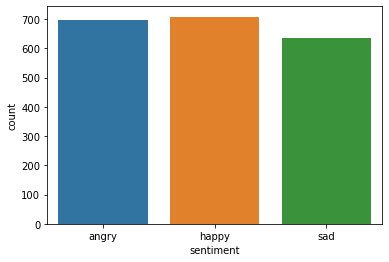

In [33]:
sns.countplot(df['sentiment'])

In [34]:
#lowering the text
df['content']=df['content'].str.lower()
df['content']

0      sometimes i’m not angry, i’m hurt and there’s ...
1                         not available for busy people☺
2      i do not exist to impress the world. i exist t...
3      everything is getting expensive except some pe...
4           my phone screen is brighter than my future 🙁
                             ...                        
630    stop crying over yesterday and start smiling f...
631    an eye with dust ‘n a heart with trust always ...
632    tears come from the heart and not from the brain.
633    sometimes you have to hold your head up high, ...
634    instead of wiping your tears, wipe away the pe...
Name: content, Length: 2039, dtype: object

In [35]:
#remove emojis
df=df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df['content']

0      sometimes im not angry, im hurt and theres a b...
1                          not available for busy people
2      i do not exist to impress the world. i exist t...
3      everything is getting expensive except some pe...
4            my phone screen is brighter than my future 
                             ...                        
630    stop crying over yesterday and start smiling f...
631    an eye with dust n a heart with trust always c...
632    tears come from the heart and not from the brain.
633    sometimes you have to hold your head up high, ...
634    instead of wiping your tears, wipe away the pe...
Name: content, Length: 2039, dtype: object

In [36]:
#remove punctuations
exclude=string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans("","",exclude))

In [37]:
df['content']=df['content'].apply(remove_punctuation)
df['content']

0      sometimes im not angry im hurt and theres a bi...
1                          not available for busy people
2      i do not exist to impress the world i exist to...
3      everything is getting expensive except some pe...
4            my phone screen is brighter than my future 
                             ...                        
630    stop crying over yesterday and start smiling f...
631    an eye with dust n a heart with trust always c...
632     tears come from the heart and not from the brain
633    sometimes you have to hold your head up high b...
634    instead of wiping your tears wipe away the peo...
Name: content, Length: 2039, dtype: object

In [38]:
#remove numerical values-
def remove_num(obj):
    text=" ".join([char for char in obj.split() if not any(c.isdigit() for c in char)])
    return text

In [39]:
df['content']=df['content'].apply(lambda x: remove_num(x))

In [40]:
#remove stopwords
stop=stopwords.words('english')

In [41]:
df['content']=df['content'].apply(lambda x:' '.join(word for word in x.split() if word not in (stop)))
df['content']

0       sometimes im angry im hurt theres big difference
1                                  available busy people
2      exist impress world exist live life way make h...
3      everything getting expensive except people get...
4                           phone screen brighter future
                             ...                        
630         stop crying yesterday start smiling tomorrow
631                  eye dust n heart trust always cries
632                               tears come heart brain
633    sometimes hold head high blink away tears say ...
634         instead wiping tears wipe away people caused
Name: content, Length: 2039, dtype: object

In [42]:
#remove duplicate values - 
def remove_duplicate_words(obj):
    l=obj.split()
    k=[]
    for i in l:
        if (obj.count(i)>=1 and i not in k):
            k.append(i)

    return ' '.join(k)

In [43]:
df['content']=df['content'].apply(lambda x: remove_duplicate_words(x) )

In [44]:
#tokenization -
df['content']=df['content'].apply(lambda x : x.split())
df['content']

0      [sometimes, im, angry, hurt, theres, big, diff...
1                              [available, busy, people]
2      [exist, impress, world, live, life, way, make,...
3      [everything, getting, expensive, except, peopl...
4                      [phone, screen, brighter, future]
                             ...                        
630    [stop, crying, yesterday, start, smiling, tomo...
631          [eye, dust, n, heart, trust, always, cries]
632                          [tears, come, heart, brain]
633    [sometimes, hold, head, high, blink, away, tea...
634    [instead, wiping, tears, wipe, away, people, c...
Name: content, Length: 2039, dtype: object

In [45]:
df.head()

,content,sentiment
0,"[sometimes, im, angry, hurt, theres, big, diff...",angry
1,"[available, busy, people]",angry
2,"[exist, impress, world, live, life, way, make,...",angry
3,"[everything, getting, expensive, except, peopl...",angry
4,"[phone, screen, brighter, future]",angry


In [46]:
df_stem=df.copy()

### Stemming - 

In [47]:
ps=PorterStemmer()

In [48]:
def stemm(word):
    return ' '.join(ps.stem(i) for i in word)

In [49]:
df_stem['content']=df_stem['content'].apply(stemm)
df_stem['content']

0                 sometim im angri hurt there big differ
1                                       avail busi peopl
2           exist impress world live life way make happi
3                everyth get expens except peopl cheaper
4                            phone screen brighter futur
                             ...                        
630              stop cri yesterday start smile tomorrow
631                     eye dust n heart trust alway cri
632                                tear come heart brain
633    sometim hold head high blink away tear say goodby
634               instead wipe tear wipe away peopl caus
Name: content, Length: 2039, dtype: object

In [50]:
df_stem.head()

,content,sentiment
0,sometim im angri hurt there big differ,angry
1,avail busi peopl,angry
2,exist impress world live life way make happi,angry
3,everyth get expens except peopl cheaper,angry
4,phone screen brighter futur,angry


### Lemmatization -

In [51]:
df_lemm=df.copy()

In [52]:
lemma=WordNetLemmatizer()

In [53]:
def lemm(text):
    return ' '.join(lemma.lemmatize(i) for i in text)

In [54]:
df_lemm['content']=df_lemm['content'].apply(lemm)
df_lemm['content']

0           sometimes im angry hurt there big difference
1                                  available busy people
2           exist impress world live life way make happy
3      everything getting expensive except people che...
4                           phone screen brighter future
                             ...                        
630            stop cry yesterday start smiling tomorrow
631                    eye dust n heart trust always cry
632                                tear come heart brain
633    sometimes hold head high blink away tear say g...
634          instead wiping tear wipe away people caused
Name: content, Length: 2039, dtype: object

In [55]:
df_lemm.head()

,content,sentiment
0,sometimes im angry hurt there big difference,angry
1,available busy people,angry
2,exist impress world live life way make happy,angry
3,everything getting expensive except people che...,angry
4,phone screen brighter future,angry


In [56]:
#remove small words
def rem_small_words(text):
    return ' '.join([word for word in text.split() if len(word)>3])

In [57]:
df_lemm['content']=df_lemm['content'].apply(lambda x:rem_small_words(x))
df_lemm['content']

0                  sometimes angry hurt there difference
1                                  available busy people
2               exist impress world live life make happy
3      everything getting expensive except people che...
4                           phone screen brighter future
                             ...                        
630                stop yesterday start smiling tomorrow
631                              dust heart trust always
632                                tear come heart brain
633     sometimes hold head high blink away tear goodbye
634          instead wiping tear wipe away people caused
Name: content, Length: 2039, dtype: object

In [58]:
df_stem['content']=df_stem['content'].apply(lambda x:rem_small_words(x))

In [59]:
df_stem.head()

,content,sentiment
0,sometim angri hurt there differ,angry
1,avail busi peopl,angry
2,exist impress world live life make happi,angry
3,everyth expens except peopl cheaper,angry
4,phone screen brighter futur,angry


### Word Visualization - 

In [60]:
from wordcloud import WordCloud, ImageColorGenerator

In [61]:
text=' '.join([word for word in df_lemm['content']])

(-0.5, 399.5, 199.5, -0.5)

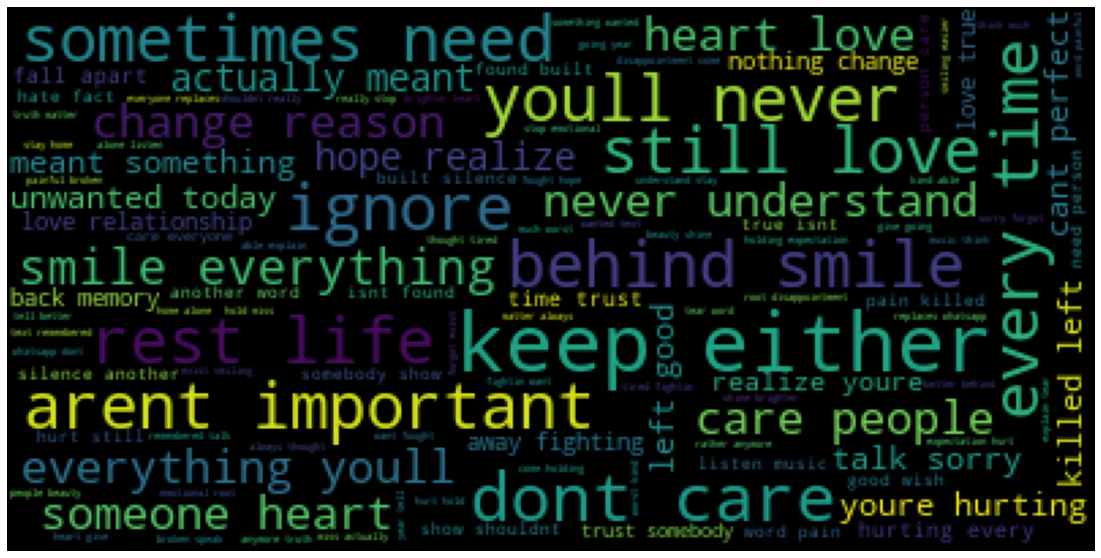

In [62]:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud)
plt.axis('off')

In [63]:
df_lemm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 634
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    2039 non-null   object
 1   sentiment  2039 non-null   object
dtypes: object(2)
memory usage: 47.8+ KB


#### Label Encoding - 

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [65]:
le.fit(df_lemm['sentiment'])

LabelEncoder()

In [66]:
df_lemm['sentiment']=le.transform(df_lemm['sentiment'])

In [67]:
df_lemm.head()

,content,sentiment
0,sometimes angry hurt there difference,0
1,available busy people,0
2,exist impress world live life make happy,0
3,everything getting expensive except people che...,0
4,phone screen brighter future,0


In [68]:
#defining dependent & independent variables - 
x=df_lemm['content']
y=df_lemm['sentiment']

In [69]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#### Count Vectorizer -

In [70]:
#count vectorizer model-
from sklearn.feature_extraction.text import CountVectorizer
countv=CountVectorizer()

In [71]:
x_train_c=countv.fit_transform(x_train)

In [72]:
x_test_c=countv.transform(x_test)

In [73]:
x_train_c.toarray()
x_test_c.toarray()

print(x_train.shape,x_test.shape)

(1529,) (510,)


In [74]:
countv.get_feature_names()[-5::]

['young', 'youre', 'yous', 'youve', 'youwhen']

## Applying Models-

For Count Vectorizer

### Logistic Regression - 

In [75]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train_c,y_train)
y_pred_lreg=lreg.predict(x_test_c)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [77]:
print('acc_score=', accuracy_score(y_test,y_pred_lreg))
print('confusion matrix = ',confusion_matrix(y_test,y_pred_lreg))
print('classification report = ',classification_report(y_test,y_pred_lreg))

acc_score= 0.7372549019607844
confusion matrix =  [[144  31  14]
 [ 22 128  21]
 [ 14  32 104]]
classification report =                precision    recall  f1-score   support

           0       0.80      0.76      0.78       189
           1       0.67      0.75      0.71       171
           2       0.75      0.69      0.72       150

    accuracy                           0.74       510
   macro avg       0.74      0.73      0.74       510
weighted avg       0.74      0.74      0.74       510



### Naive Bays -

In [78]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [79]:
mnb.fit(x_train_c,y_train)
y_pred_mnb=mnb.predict(x_test_c)

In [80]:
print('acc_score=', accuracy_score(y_test,y_pred_mnb))
print('confusion matrix = ',confusion_matrix(y_test,y_pred_mnb))
print('classification report = ',classification_report(y_test,y_pred_mnb))

acc_score= 0.615686274509804
confusion matrix =  [[100  72  17]
 [  7 140  24]
 [ 14  62  74]]
classification report =                precision    recall  f1-score   support

           0       0.83      0.53      0.65       189
           1       0.51      0.82      0.63       171
           2       0.64      0.49      0.56       150

    accuracy                           0.62       510
   macro avg       0.66      0.61      0.61       510
weighted avg       0.67      0.62      0.61       510



### Support Vector Machine -

In [81]:
from sklearn.svm import SVC
svm=SVC()

In [82]:
svm.fit(x_train_c,y_train)
y_pred_svm=svm.predict(x_test_c)

In [83]:
print('acc_score=', accuracy_score(y_test,y_pred_svm))
print('confusion matrix = ',confusion_matrix(y_test,y_pred_svm))
print('classification report = ',classification_report(y_test,y_pred_svm))

acc_score= 0.6725490196078432
confusion matrix =  [[115  68   6]
 [ 10 151  10]
 [ 11  62  77]]
classification report =                precision    recall  f1-score   support

           0       0.85      0.61      0.71       189
           1       0.54      0.88      0.67       171
           2       0.83      0.51      0.63       150

    accuracy                           0.67       510
   macro avg       0.74      0.67      0.67       510
weighted avg       0.74      0.67      0.67       510



### XGBoost Classifier -

In [84]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [85]:
xgb.fit(x_train_c,y_train)
y_pred_xgb=xgb.predict(x_test_c)

In [86]:
print('acc_score=', accuracy_score(y_test,y_pred_xgb))
print('confusion matrix = ',confusion_matrix(y_test,y_pred_xgb))
print('classification report = ',classification_report(y_test,y_pred_xgb))

acc_score= 0.7509803921568627
confusion matrix =  [[144  31  14]
 [ 18 132  21]
 [ 12  31 107]]
classification report =                precision    recall  f1-score   support

           0       0.83      0.76      0.79       189
           1       0.68      0.77      0.72       171
           2       0.75      0.71      0.73       150

    accuracy                           0.75       510
   macro avg       0.75      0.75      0.75       510
weighted avg       0.76      0.75      0.75       510



### Tf-IDf Vectorizer - 

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [88]:
x_train_v=tfidf.fit_transform(x_train)
x_test_v=tfidf.transform(x_test)

In [89]:
x_train_v.toarray()
x_test_v.toarray()

print(x_train_v.shape,x_test_v.shape)

(1529, 1835) (510, 1835)


### Model Accuracy using Tf-Idf Vectorizer -

#### Logistic Regression - 

In [90]:
lreg.fit(x_train_v,y_train)
y_pred_lreg=lreg.predict(x_test_v)

In [91]:
print('acc_score=', accuracy_score(y_test,y_pred_lreg))
print('confusion matrix = ',confusion_matrix(y_test,y_pred_lreg))
print('classification report = ',classification_report(y_test,y_pred_lreg))

acc_score= 0.7490196078431373
confusion matrix =  [[148  32   9]
 [ 21 131  19]
 [ 13  34 103]]
classification report =                precision    recall  f1-score   support

           0       0.81      0.78      0.80       189
           1       0.66      0.77      0.71       171
           2       0.79      0.69      0.73       150

    accuracy                           0.75       510
   macro avg       0.75      0.75      0.75       510
weighted avg       0.76      0.75      0.75       510



#### Naive Bays - 

In [92]:
mnb.fit(x_train_v,y_train)
y_pred_mnb=mnb.predict(x_test_v)

In [93]:
print('acc_score=', accuracy_score(y_test,y_pred_mnb))
print('confusion matrix = ',confusion_matrix(y_test,y_pred_mnb))
print('classification report = ',classification_report(y_test,y_pred_mnb))

acc_score= 0.7019607843137254
confusion matrix =  [[141  27  21]
 [ 19 107  45]
 [ 12  28 110]]
classification report =                precision    recall  f1-score   support

           0       0.82      0.75      0.78       189
           1       0.66      0.63      0.64       171
           2       0.62      0.73      0.67       150

    accuracy                           0.70       510
   macro avg       0.70      0.70      0.70       510
weighted avg       0.71      0.70      0.70       510



#### Support Vector Machine -

In [94]:
svm.fit(x_train_v,y_train)
y_pred_svm=svm.predict(x_test_v)

In [95]:
print('acc_score=', accuracy_score(y_test,y_pred_svm))
print('confusion matrix = ',confusion_matrix(y_test,y_pred_svm))
print('classification report = ',classification_report(y_test,y_pred_svm))

acc_score= 0.7666666666666667
confusion matrix =  [[151  36   2]
 [ 16 142  13]
 [  9  43  98]]
classification report =                precision    recall  f1-score   support

           0       0.86      0.80      0.83       189
           1       0.64      0.83      0.72       171
           2       0.87      0.65      0.75       150

    accuracy                           0.77       510
   macro avg       0.79      0.76      0.77       510
weighted avg       0.79      0.77      0.77       510



### XGBoost Classifier -

In [96]:
xgb.fit(x_train_v,y_train)
y_pred_xgb=xgb.predict(x_test_v)

In [97]:
print('acc_score=', accuracy_score(y_test,y_pred_xgb))
print('confusion matrix = ',confusion_matrix(y_test,y_pred_xgb))
print('classification report = ',classification_report(y_test,y_pred_xgb))

acc_score= 0.7725490196078432
confusion matrix =  [[150  30   9]
 [ 18 141  12]
 [ 17  30 103]]
classification report =                precision    recall  f1-score   support

           0       0.81      0.79      0.80       189
           1       0.70      0.82      0.76       171
           2       0.83      0.69      0.75       150

    accuracy                           0.77       510
   macro avg       0.78      0.77      0.77       510
weighted avg       0.78      0.77      0.77       510

